Пробуем сделать простое дерево решений и работать с ним

In [1]:
import json
import dtreevoi
import matplotlib.pyplot as plt
import numpy as np

# Задача 3

Вы эксплуатируете месторождение нефти. У вас есть добывающая скважина, которая уже отлично работает. Но вам кажется, что она может работать лучше. По опыту эксплуатации скважин-аналогов вы подозреваете наличие положительного скин-фактора, который можно удалить кислотной обработкой.

Скважина дает 40 т/сут (стоимость нефти 10 тыс.руб./т). Скин-фактор S неизвестен.

Стоимость идеального ГДИС - КВД 1 млн.руб. Стоимость ОПЗ 1 млн. руб. Снижает скин в 2 раза. Эффект длится 1 год.

Априорная информация:

- S = 14 вероятность 50%
- S = 7 вероятность 20%
- S = 0 вероятность 30%

Что делать? Какова стоимость информации для КВД в данных условиях. Какие параметры влияют на стоимость информации. Что надо изменить в условиях чтобы оправдать проведение более дорогих исследований?

---


В отличии от предыдущих задач для расчета денежных эффектов на основе изменения скин-фактора скважины требуются инженерные расчеты. В данной задаче они просты, но в реальных задачах могут быть более сложными.

По формуле Дюпюи для псевдо-установившегося радиального притока к скважине можно оценить дебит скважины:
$$Q = \frac{kh}{18.41 \mu B} \frac{P_{res} - P_{wf}}{ \ln \dfrac{r_e}{r_w} - \dfrac{3}{4} + S } \tag{1}$$

где 
- $Q$ - дебит жидкости в стандартных условиях, м$^3$/сут
- $k$ - эффективная проницаемость пласта, мД
- $h$ - эффективная мощность пласта, м
- $\mu$ - вязкость нефти, сП
- $B$ - объемный коэффициент нефти, м$^3$/м$^3$
- $P_{res}$ - среднее пластовое давление в конечной области дренирования
- $P_{wf}$ - забойное давление
- $r_e$ - радиус области дренирования
- $r_w$ - радиус скважины
- $S$ - скин-фактор

Нас интересует отношение дебитов скважины до и после обработки призабойной зоны. Будет значения до обозначать индексом 1, значения после индексом 2. 

$$\frac{Q_1}{Q_2} = \frac{\ln \dfrac{r_e}{r_w} - \dfrac{3}{4} + S_2}{\ln \dfrac{r_e}{r_w} - \dfrac{3}{4} + S_1} \tag{2}$$

Видно что кратность прироста зависит только от скин-фактора и размеров области дренирования. 
Причем характерный параметр области дренирования $\ln \dfrac{r_e}{r_w}- \dfrac{3}{4}$ меняется слабо и может быть для грубых оценок принят равным 7.

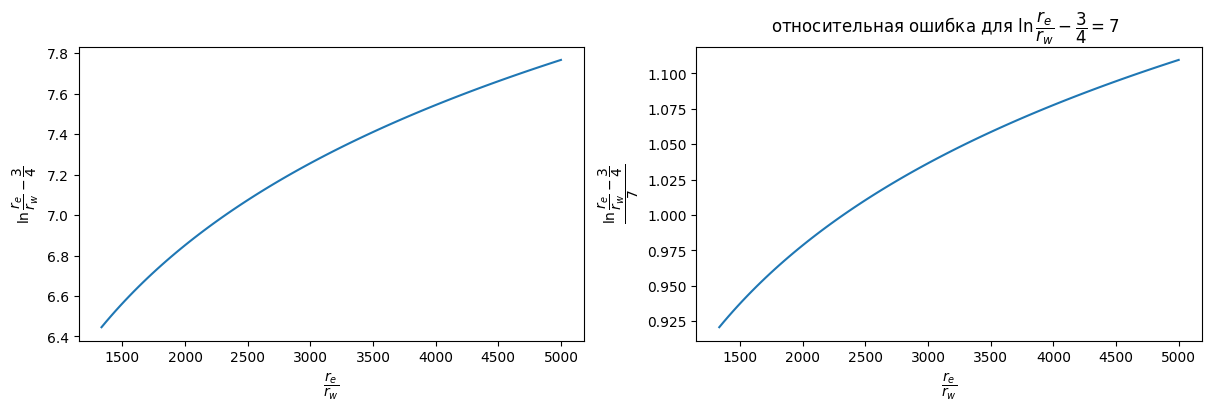

In [10]:
def ln_re_rw(re_rw):
    return np.log(re_rw)-0.75
rerw_list = np.linspace(200/0.15, 500/0.1, 100)

fig, ax = plt.subplots(1,2,figsize=(12, 4), layout='constrained')
ax[0].plot(rerw_list, ln_re_rw(rerw_list))
ax[1].plot(rerw_list, ln_re_rw(rerw_list)/7)
ax[0].set_xlabel('$\\dfrac{r_e}{r_w}$')
ax[0].set_ylabel('$\\ln \\dfrac{r_e}{r_w}- \\dfrac{3}{4}$')
ax[1].set_xlabel('$\\dfrac{r_e}{r_w}$')
ax[1].set_ylabel('$\\dfrac{ \\ln \\dfrac{r_e}{r_w}- \\dfrac{3}{4} }{7}$')
ax[1].set_title('относительная ошибка для $\\ln \\dfrac{r_e}{r_w}- \\dfrac{3}{4} = 7$  ')
plt.show()

теперь можно оценить изменения дебита скважины при снижении скин-фактора из за ОПЗ.

In [11]:
def q_increment(q_base, s1, s2):
    return q_base*(7 + s1)/(7 + s2) - q_base
def money_increment(dq, qprice_trt=10, dtime=365):
    return dq * qprice_trt * dtime

s1 = 14
qbase = 40

dq = q_increment(qbase, s1=s1, s2=s1/2)
dmoney = money_increment(dq)
print(f'снижение скин-фактора с 14 до 7 даст прирост dQ ={dq:.2f} т/сут нефти, прирост денег = {dmoney/1000:.2f} млн.руб')


s1 = 7

dq = q_increment(qbase, s1=s1, s2=s1/2)
dmoney = money_increment(dq)
print(f'снижение скин-фактора с 14 до 7 даст прирост dQ ={dq:.2f} т/сут нефти, прирост денег = {dmoney/1000:.2f} млн.руб')

s1 = 0

dq = q_increment(qbase, s1=s1, s2=s1/2)
dmoney = money_increment(dq)
print(f'снижение скин-фактора с 14 до 7 даст прирост dQ ={dq:.2f} т/сут нефти, прирост денег = {dmoney/1000:.2f} млн.руб')


снижение скин-фактора с 14 до 7 даст прирост dQ =20.00 т/сут нефти, прирост денег = 73.00 млн.руб
снижение скин-фактора с 14 до 7 даст прирост dQ =13.33 т/сут нефти, прирост денег = 48.67 млн.руб
снижение скин-фактора с 14 до 7 даст прирост dQ =0.00 т/сут нефти, прирост денег = 0.00 млн.руб


по полученным данным можно построить следующее дерево

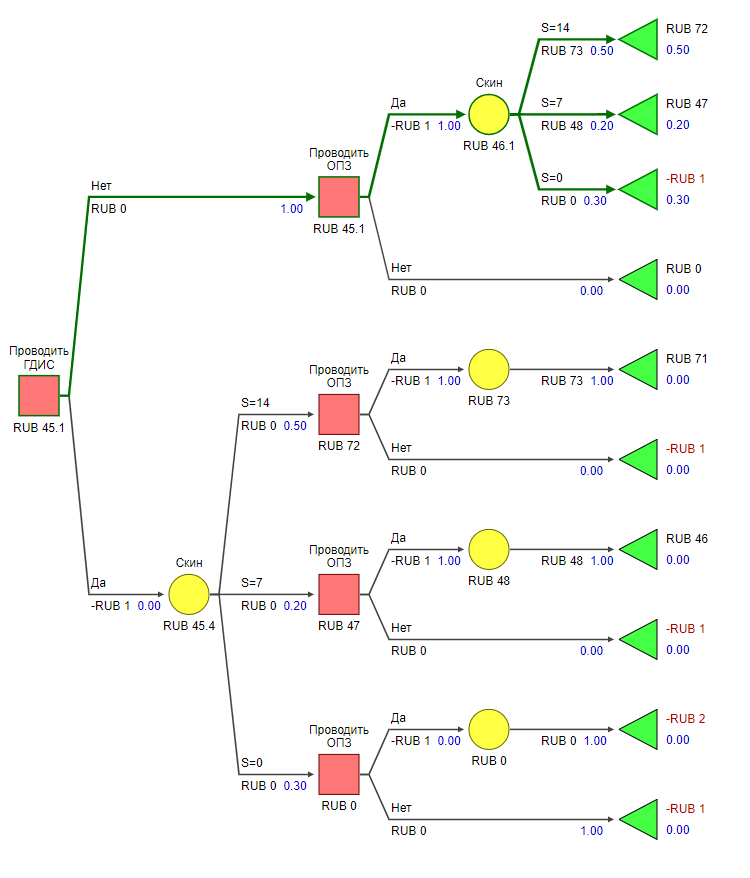

Надо подставить вместо цифр расчетные формулы 
и нарисовать графики 
- зависимости EMV, VOI от стоимости ОПЗ
- зависимости EMV, VOI от стоимости ГДИС
- зависимости EMV, VOI от вероятности наличия скин-фактора (средний скин и дисперсия)

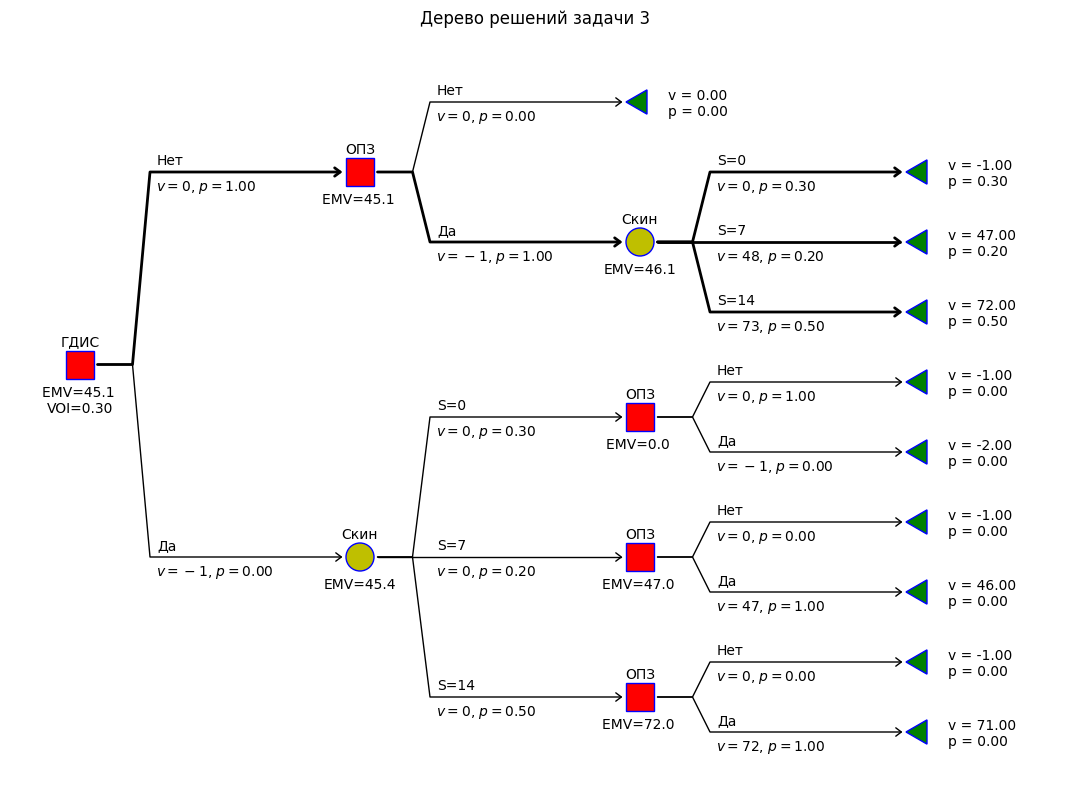

In [12]:
# загрузим дерево из файла tree_3.json
with open('tree_3.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)
# запуск расчета дерева
dtreevoi.solve_tree(tree)
# нарисуем дерево
fig, ax = plt.subplots(figsize=(15, 10))
dtreevoi.plot_tree(tree, ax, 4, 3)
plt.title('Дерево решений задачи 3')
plt.show()

In [13]:
# Константы
q_base = 40  # базовый дебит скважины, т/сут
q_price_trt = 10000  # стоимость нефти, руб/т
d_time = 365  # время, дни

def ln_re_rw(re_rw):
    return np.log(re_rw) - 0.75

def q_increment(q_base, s1, s2):
    return q_base * (7 + s1) / (7 + s2) - q_base

def money_increment(dq):
    return dq * q_price_trt * d_time

# Пример расчета для различных скин-факторов
skin_factors = [14, 7, 0]  # S1
results = []

for s1 in skin_factors:
    dq = q_increment(q_base, s1=s1, s2=s1 / 2)
    dmoney = money_increment(dq)
    results.append((s1, dq, dmoney / 1_000_000))  # Конвертация в млн.руб

for s1, dq, dmoney in results:
    print(f'Снижение скин-фактора с {s1} до {s1/2} даст прирост dQ = {dq:.2f} т/сут нефти, прирост денег = {dmoney:.2f} млн.руб')

Снижение скин-фактора с 14 до 7.0 даст прирост dQ = 20.00 т/сут нефти, прирост денег = 73.00 млн.руб
Снижение скин-фактора с 7 до 3.5 даст прирост dQ = 13.33 т/сут нефти, прирост денег = 48.67 млн.руб
Снижение скин-фактора с 0 до 0.0 даст прирост dQ = 0.00 т/сут нефти, прирост денег = 0.00 млн.руб


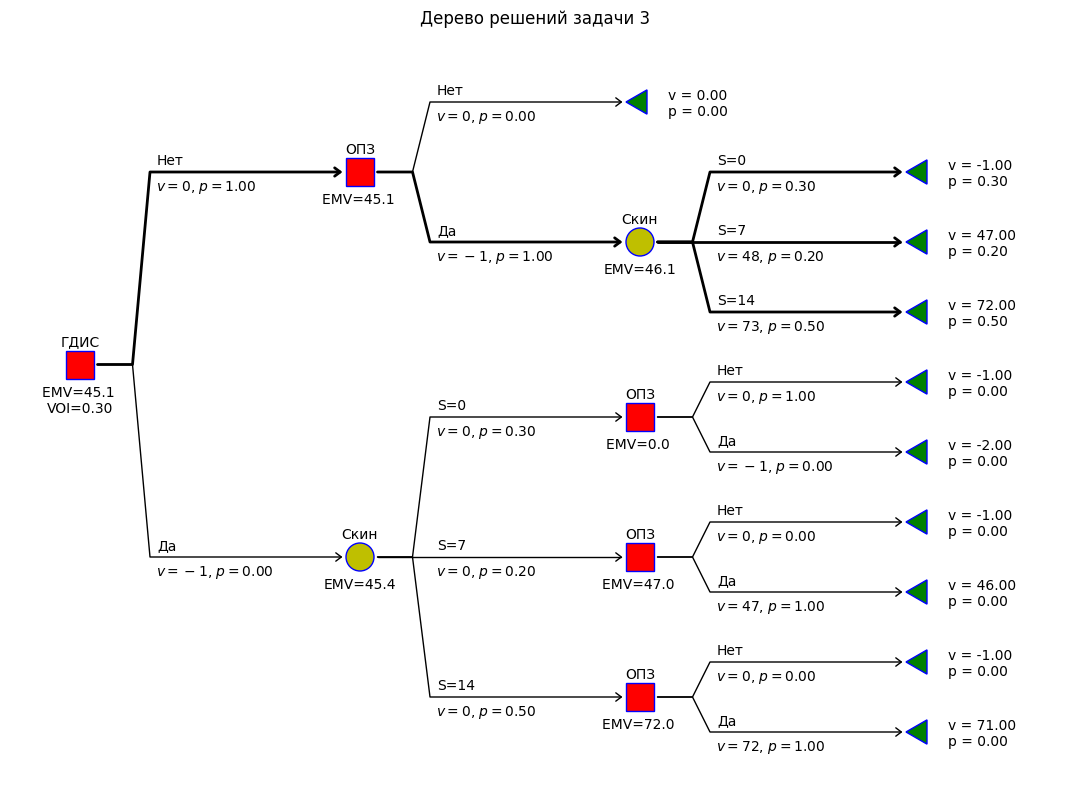

In [14]:
# загрузим дерево из файла tree_3.json
with open('tree_3.json', 'r', encoding='utf-8') as f:
    tree3 = json.load(f)

dtreevoi.solve_tree(tree3)

# Визуализация дерева
fig, ax = plt.subplots(figsize=(15, 10))
dtreevoi.plot_tree(tree3, ax, 4, 3)
plt.title('Дерево решений задачи 3')
plt.show()

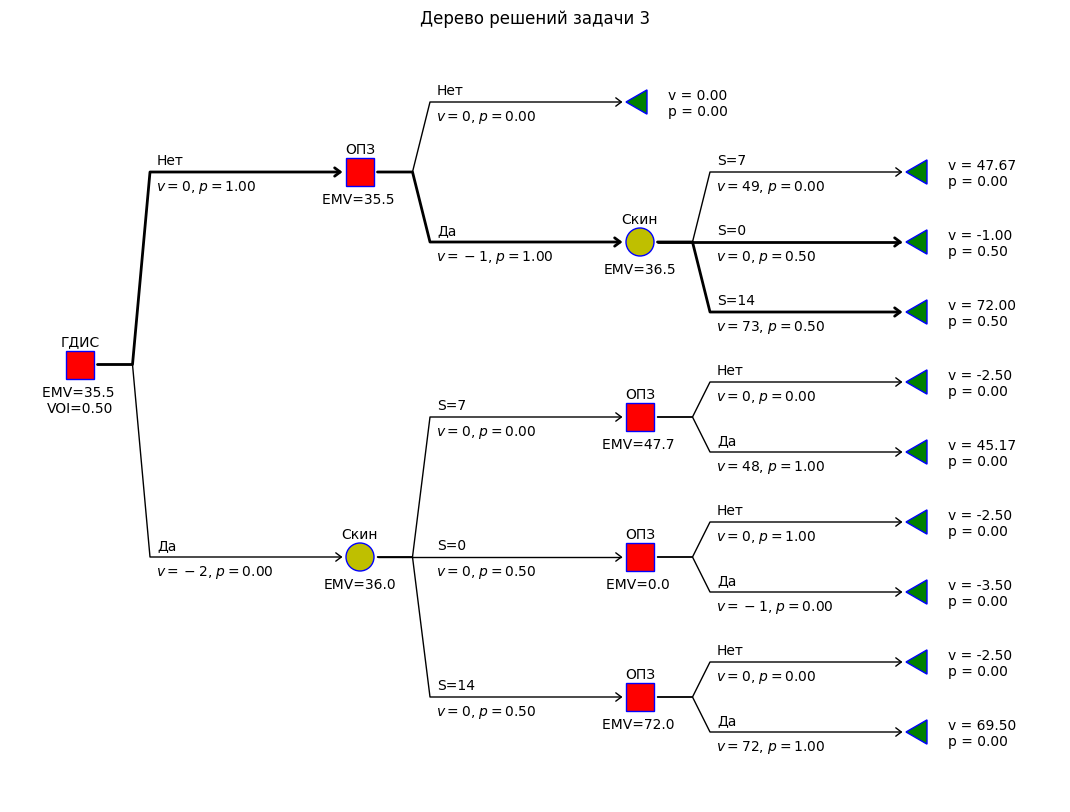

In [15]:
# загрузим дерево из файла tree_3.json
with open('tree_3.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)

# Определяем глобальные переменные
q_base = 40  # Базовый дебит (пример)
q_price_trt = 10000  # Цена на нефть за единицу дебита (руб/тонну)
d_time = 365  # Длительность эффекта (например, дни)
opz_cost = 1_000_000  # Стоимость ОПЗ в рублях
gdis_cost = 2_500_000 # Стоимость ГДИС в рублях
skin_factors = [14, 0, 7]  # Пример значений скин-факторов
skin_probabilities = [0.5, 0.5, 0]  # Вероятности для соответствующих скин-факторов

# Функции для расчета дебита и прироста денег
def q_increment(q_base, s1, s2):
    """Вычисляет прирост дебита на основе изменения скин-фактора"""
    return q_base * (7 + s1) / (7 + s2) - q_base

def money_increment(dq, q_price_trt, d_time, opz_cost=0):
    """Вычисляет денежный прирост на основе дебита, учитывая стоимость ОПЗ"""
    return dq * q_price_trt * d_time - opz_cost  # Вычитаем стоимость ОПЗ


# Функция для обновления названий скин-факторов в узлах
def update_skin_labels_and_probabilities(tree, skin_factors, skin_probabilities):
    """
    Обновляет названия скин-факторов и вероятности в узлах дерева,
    заменяя их на новые значения из skin_factors и skin_probabilities.
    """
    stack = [tree]  # Используем стек для обхода
    skin_factor_index = 0  # Индекс для доступа к значениям из skin_factors

    while stack:
        current_node = stack.pop()  # Берем текущий узел

        if "child_edges" in current_node:
            for edge in current_node["child_edges"]:
                # Если это узел с скин-факторами, обновляем название и вероятность
                if edge["name"].startswith("S="):
                    # Заменяем значение скин-фактора на значение из списка
                    new_skin = skin_factors[skin_factor_index % len(skin_factors)]  # Циклический доступ к скин-факторам
                    edge["name"] = f"S={new_skin}"  # Обновляем название скин-фактора
                    
                    # Обновляем вероятность для текущего скин-фактора
                    edge["probability"] = skin_probabilities[skin_factor_index % len(skin_probabilities)]

                    # Увеличиваем индекс для следующего скин-фактора
                    skin_factor_index += 1

                # Добавляем child_node в стек, если он есть
                if "child_node" in edge:
                    stack.append(edge["child_node"])


# Обработка узлов с "Скин" без рекурсии
def process_last_skin_decision(tree, q_base, q_price_trt, d_time, opz_cost):
    """
    Спускаемся к узлам с скин-факторами, где происходят последние разделения.
    Меняем только конечные значения payoff на основе скина,
    если это узел "Да".
    """
    stack = [tree]  # Используем стек для обхода

    while stack:
        current_node = stack.pop()  # Берем текущий узел

        if "child_edges" in current_node:
            for edge in current_node["child_edges"]:
                # Проверяем, если это узел с скин-факторами
                if edge["name"].startswith("S="):
                    s1 = float(edge["name"].split("=")[1])
                    s2 = s1 / 2  

                    # Рассчитываем прирост дебита
                    dq = q_increment(q_base, s1, s2)
                    dmoney = money_increment(dq, q_price_trt, d_time, opz_cost)

                    # Если есть child_node и в нем "child_edges"
                    if "child_node" in edge and "child_edges" in edge["child_node"]:
                        for final_edge in edge["child_node"]["child_edges"]:
                            if final_edge["name"] == "Да":
                                # Обновляем payoff 
                                final_edge["payoff"] = dmoney / 1_000_000  # Преобразование в миллионы рублей
                    else:
                        # Если нет child_edges, ничего не обновляем
                        continue

                # Добавляем child_node в стек, если он есть
                if "child_node" in edge:
                    stack.append(edge["child_node"])

# Функция обработки узлов "ГДИС"
def process_gdis_choice(tree, q_base, q_price_trt, d_time, opz_cost):
    """
    Функция обрабатывает выбор "Да" или "Нет" на уровне "ГДИС".
    Если "Да", изменения происходят только в ветках, где указаны конечные скин-факторы.
    Если "Нет", продолжается стандартная логика пересчётов.
    """
    stack = [tree]  # Используем стек для обхода

    while stack:
        current_node = stack.pop()

        if "child_edges" in current_node:
            for edge in current_node["child_edges"]:
                # Обрабатываем выбор на уровне "ГДИС"
                if current_node["name"] == "ГДИС":
                    if edge["name"] == "Да":
                        # Если выбрано "Да", работаем только с поддеревом "Да"
                        # Обновляем payoff 
                        process_last_skin_decision(edge["child_node"], q_base, q_price_trt, d_time, opz_cost)
                    elif edge["name"] == "Нет":
                        # Если выбрано "Нет", продолжаем обычный пересчёт
                        update_payoff(edge["child_node"], q_base, q_price_trt, d_time, opz_cost)

                # Добавляем child_node в стек, если он есть
                if "child_node" in edge:
                    stack.append(edge["child_node"])

# Рекурсивная функция для обновления payoff по дереву решений
def update_payoff(tree, q_base, q_price_trt, d_time, opz_cost):
    if "child_edges" in tree:
        for edge in tree["child_edges"]:
            # Если это узел с скин-фактором
            if edge["name"].startswith("S="):
                s1 = float(edge["name"].split("=")[1])
                s2 = s1 / 2  # Пример снижения скин-фактора в два раза

                # Рассчитываем прирост дебита и денег
                dq = q_increment(q_base, s1, s2)
                dmoney = money_increment(dq, q_price_trt, d_time)

                # Обновляем payoff (денежный эффект)
                edge["payoff"] = dmoney / 1_000_000  # Преобразование в миллионы

            elif edge["name"] == "Да":
                edge["payoff"] = -opz_cost / 1_000_000  # Изменение стоимости ОПЗ в млн
             
            # Рекурсивно идем дальше по дереву
            if "child_node" in edge:
                update_payoff(edge["child_node"], q_base, q_price_trt, d_time, opz_cost)

# Функция для изменения стоимости (payoff) в корневом узле
def update_gdis_payoff(tree, new_payoff_yes, new_payoff_no):
    
    # Обновление payoffs для корневого узла
    for edge in tree['child_edges']:
        if edge['name'] == "Да":
            edge['payoff'] = -new_payoff_yes/1_000_000
        elif edge['name'] == "Нет":
            edge['payoff'] = new_payoff_no

update_gdis_payoff(tree, gdis_cost, 0)
update_skin_labels_and_probabilities(tree, skin_factors, skin_probabilities)
process_gdis_choice(tree, q_base, q_price_trt, d_time, opz_cost)

# запуск расчета дерева
dtreevoi.solve_tree(tree)
# нарисуем дерево
fig, ax = plt.subplots(figsize=(15, 10))
dtreevoi.plot_tree(tree, ax, 4, 3)
plt.title('Дерево решений задачи 3')
plt.show()

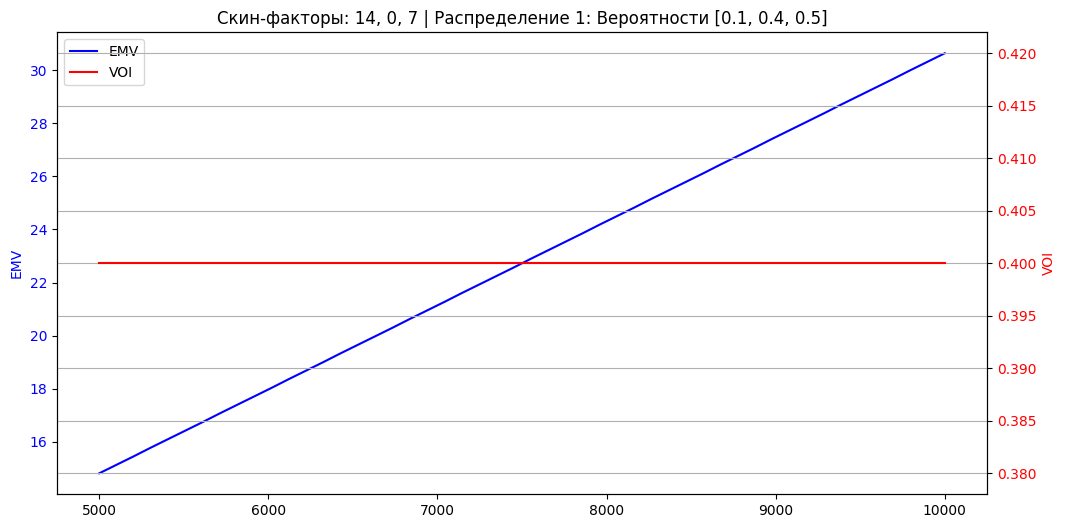

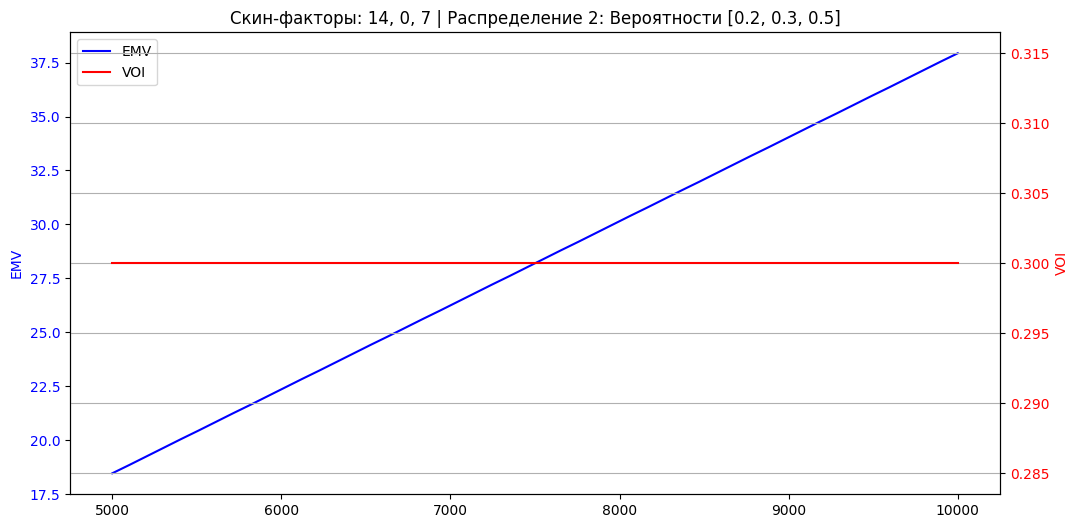

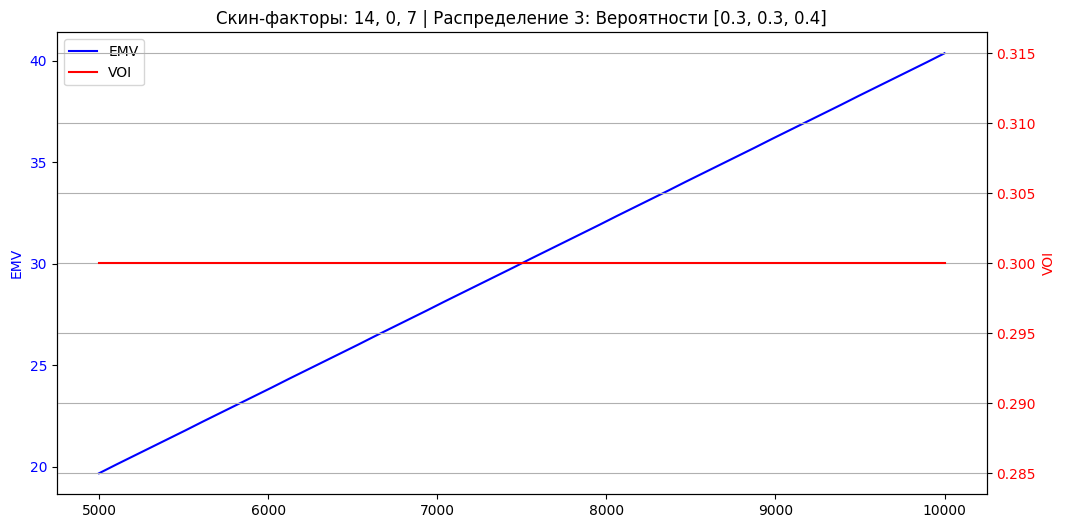

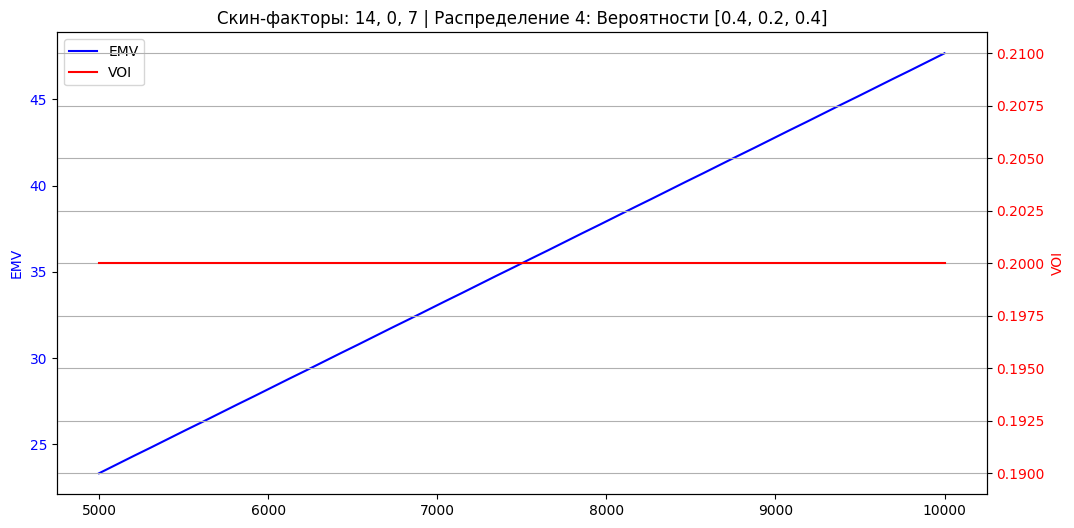

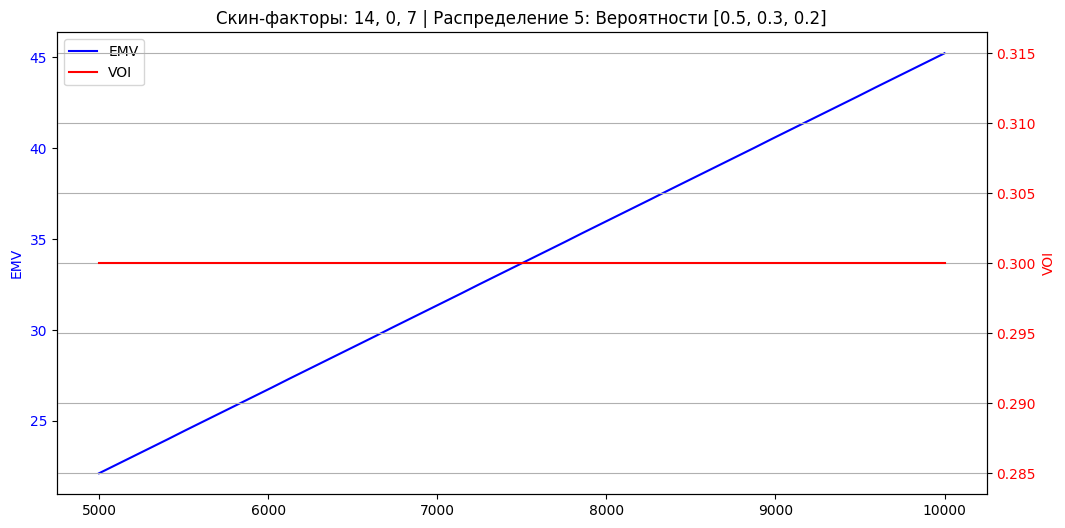

In [17]:
# загрузим дерево из файла tree_3.json
with open('tree_3.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)

# Определяем глобальные переменные
q_base = 40  # Базовый дебит (пример)
min_price = 5000  # Минимальная стоимость нефти
max_price = 10000  # Максимальная стоимость нефти
num_points = 50  # Количество значений
q_price_trt_values = np.linspace(min_price, max_price, num_points)  # Генерация цен на нефть
d_time = 365  # Длительность эффекта (например, дни)
opz_cost = 1_000_000  # Стоимость ОПЗ в рублях
skin_factors = [14, 0, 7]  # Пример значений скин-факторов

# Различные распределения вероятностей
skin_probabilities_list = [
    [0.1, 0.4, 0.5],
    [0.2, 0.3, 0.5],
    [0.3, 0.3, 0.4],
    [0.4, 0.2, 0.4], 
    [0.5, 0.3, 0.2]  
]

# Цикл по распределениям вероятностей
for prob_index, skin_probabilities in enumerate(skin_probabilities_list):
    # Обновление названий скин-факторов и вероятностей
    update_skin_labels_and_probabilities(tree, skin_factors, skin_probabilities)

    # Списки для хранения значений EMV и VOI
    emv_values = []
    voi_values = []

    # Цикл по значениям цены на нефть
    for q_price_trt in q_price_trt_values:
        process_gdis_choice(tree, q_base, q_price_trt, d_time, opz_cost)
        dtreevoi.solve_tree(tree)

        # Чтение результатов расчета дерева из корневого узла
        emv = round(tree['emv'], 2)  # Округляем EMV
        voi = round(tree['voi'], 2)  # Округляем VOI

        # Добавляем результаты в списки
        emv_values.append(emv)
        voi_values.append(voi)

    # Создаем новый график для каждого распределения вероятностей
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # График EMV
    emv_line, = ax1.plot(q_price_trt_values, emv_values, label='EMV', color='b')
    ax1.set_ylabel('EMV', color='b') 
    ax1.tick_params(axis='y', labelcolor='b')

    # Создаем вторую ось для VOI
    ax2 = ax1.twinx()
    voi_line, = ax2.plot(q_price_trt_values, voi_values, label='VOI', color='r') 
    ax2.set_ylabel('VOI', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Заголовок графика
    skin_factors_str = ', '.join(map(str, skin_factors))
    plt.title(f'Скин-факторы: {skin_factors_str} | Распределение {prob_index + 1}: Вероятности {skin_probabilities}')
    plt.xlabel('Стоимость нефти (руб/тонну)')
    plt.grid()

    lines = [emv_line, voi_line]  # Линии EMV и VOI
    labels = ['EMV', 'VOI']  # Соответствующие метки
    ax1.legend(lines, labels, loc='upper left')

    # Отображаем график
    plt.show()

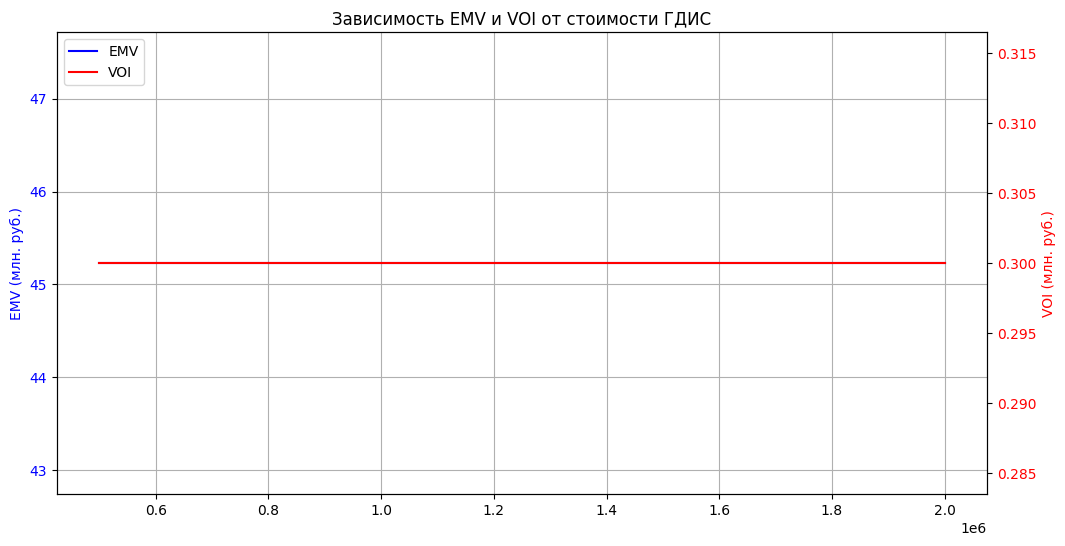

In [18]:
# Загрузка дерева из файла
with open('tree_3.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)

# Определяем глобальные переменные
q_base = 40  # Базовый дебит (пример)
gdis_cost_values = np.linspace(500_000, 2_000_000, 50)  # Диапазон стоимости ГДИС
q_price_trt = 10000  # Цена на нефть за единицу дебита (руб/тонну)
d_time = 365  # Длительность эффекта (например, дни)
opz_cost = 1_000_000  # Стоимость ОПЗ в рублях
skin_factors = [14, 0, 7]  # Пример значений скин-факторов
skin_probabilities = [0.5, 0.3, 0.2]  # Вероятности для соответствующих скин-факторов

# цикл для расчетов
emv_values = []
voi_values = []

for gdis_cost in gdis_cost_values:
    update_gdis_payoff(tree, gdis_cost, 0)
    update_skin_labels_and_probabilities(tree, skin_factors, skin_probabilities)
    process_gdis_choice(tree, q_base, q_price_trt, d_time, opz_cost)
    dtreevoi.solve_tree(tree)

    # Сохранение результатов
    emv_values.append(round(tree['emv'], 2))
    voi_values.append(round(tree['voi'], 2))


# Построение графиков
fig, ax1 = plt.subplots(figsize=(12, 6))

# График EMV
ax1.plot(gdis_cost_values, emv_values, label='EMV', color='b')
ax1.set_ylabel('EMV (млн. руб.)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Создаем вторую ось для VOI
ax2 = ax1.twinx()
ax2.plot(gdis_cost_values, voi_values, label='VOI', color='r')
ax2.set_ylabel('VOI (млн. руб.)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Зависимость EMV и VOI от стоимости ГДИС')
plt.xlabel('Стоимость ГДИС (руб.)')
ax1.grid()

lines = [emv_line, voi_line]
labels = ['EMV', 'VOI']
ax1.legend(lines, labels, loc='upper left')

plt.show()

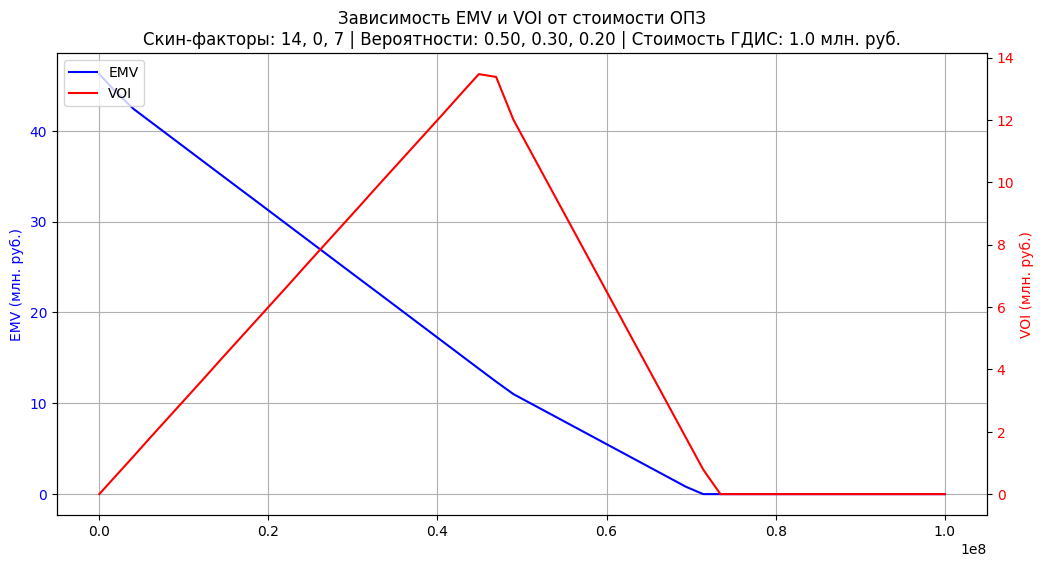

In [19]:
# Загрузка дерева из файла
with open('tree_3.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)

# Определяем глобальные переменные
q_base = 40  # Базовый дебит (пример)
opz_cost_values = np.linspace(0, 100_000_000, 50)  # Диапазон стоимости ОПЗ
q_price_trt = 10000  # Цена на нефть за единицу дебита (руб/тонну)
d_time = 365  # Длительность эффекта (например, дни)
gdis_cost = 1_000_000  # Стоимость ГДИС в рублях
skin_factors = [14, 0, 7]  # Пример значений скин-факторов
skin_probabilities = [0.5, 0.3, 0.2]  # Вероятности для соответствующих скин-факторов

# цикл для расчетов
emv_values = []
voi_values = []

for opz_cost in opz_cost_values:
    
    update_gdis_payoff(tree, gdis_cost, 0)
    update_skin_labels_and_probabilities(tree, skin_factors, skin_probabilities)
    process_gdis_choice(tree, q_base, q_price_trt, d_time, opz_cost)
    dtreevoi.solve_tree(tree)

    # Сохранение результатов
    emv_values.append(round(tree['emv'], 2))
    voi_values.append(round(tree['voi'], 2))

# Построение графиков
fig, ax1 = plt.subplots(figsize=(12, 6))

# График EMV
ax1.plot(opz_cost_values, emv_values, label='EMV', color='b')
ax1.set_ylabel('EMV (млн. руб.)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Создаем вторую ось для VOI
ax2 = ax1.twinx()
ax2.plot(opz_cost_values, voi_values, label='VOI', color='r')
ax2.set_ylabel('VOI (млн. руб.)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Создаем строку для вероятностей скин-факторов
skin_prob_str = ', '.join([f'{s:.2f}' for s in skin_probabilities])
# Создаем строку для скин-факторов
skin_factors_str = ', '.join([f'{s}' for s in skin_factors])

plt.title(f'Зависимость EMV и VOI от стоимости ОПЗ\n'
          f'Скин-факторы: {skin_factors_str} | '
          f'Вероятности: {skin_prob_str} | '
          f'Стоимость ГДИС: {gdis_cost/1_000_000:.1f} млн. руб.')
plt.xlabel('Стоимость ОПЗ (руб.)')
ax1.grid()

lines = [emv_line, voi_line]
labels = ['EMV', 'VOI']
ax1.legend(lines, labels, loc='upper left')

plt.show()